In [1]:
import numpy as np
import qp
import scipy.stats as ss
import matplotlib.pyplot as plt
import individual_metrics_cutkscvm as inmet
%matplotlib inline

In [2]:
truefunc = ss.norm(loc=5.0,scale=0.5)
x = np.arange(0.0,10.0,0.02)
truex = truefunc.pdf(x)

In [3]:
truegrid=np.zeros([10000,len(truex)])
for i in range(10000):
    truegrid[i,:] = truex

In [4]:
true_pdf = qp.Ensemble(truegrid.shape[0],gridded=(x,truegrid))

made the pool of 4 in 0.0259261131287
made the catalog in 18.4000520706


In [5]:
truesample = np.array(truefunc.rvs(size=10000))

In [6]:
testtrue = inmet.EvaluateMetric(true_pdf,truesample)

In [7]:
trueks,truepval = testtrue.KS(using='gridded',dx=0.0001,vmin=0.005,vmax=0.995)
print trueks
print truepval

now with proper uniform range
0.00745193230414
0.638119511047


In [8]:
centerpoints = np.array([2.,3.,4.,4.5,4.7,4.9,4.95,5.0,5.05,5.10,5.3,5.5,6.,7.,8.])
numpoints= len(centerpoints)
ksvals = np.zeros(numpoints)
kspvals = np.zeros(numpoints)
cvmvals = np.zeros(numpoints)
cvmpvals = np.zeros(numpoints)
advals = np.zeros(numpoints)
adpvals = np.zeros(numpoints)
vminx = 0.005
vmaxx = 0.995

In [9]:
for i,cent in enumerate(centerpoints):
    print "doing centerpoint %f"%(cent)
    xdist= ss.norm(loc=cent,scale=0.5)
    xsample = np.array(xdist.rvs(size=10000))
    testx = inmet.EvaluateMetric(true_pdf,xsample)
    ksvals[i],kspvals[i] = testx.KS(using='gridded',dx=0.0001,vmin = 0.001,vmax=0.999)
    print ksvals[i]
    print kspvals[i]
    cvmvals[i],cvmpvals[i] = testx.CvM(using='gridded',dx=0.0001,vmin=0.001,vmax=0.999)
    print cvmvals[i]
    print cvmpvals[i]
    advals[i],adpvals[i] = testx.AD(using='gridded',dx=0.0001,vmin=vminx,vmax=vmaxx)
    print advals[i]
    print adpvals[i]


doing centerpoint 2.000000
now with proper uniform range
0.918983143506
1.29571666086e-14
now with proper uniform range
4.12221240955
-1.03502317828e-09
now with proper uniform range
6.13760183907
0.00132650827233
doing centerpoint 3.000000
now with proper uniform range
0.897348386334
0.0897888122872
now with proper uniform range
589.442615811
0.140554330209
now with proper uniform range
2257.59730537
7.87401574609e-07
doing centerpoint 4.000000
now with proper uniform range
0.655363035479
0.278343104782
now with proper uniform range
1806.54980082
0.291841671108
now with proper uniform range
9786.15142799
8.35770997965e-08
doing centerpoint 4.500000
now with proper uniform range
0.379062222079
0.0790468218387
now with proper uniform range
769.388756728
0.174729874707
now with proper uniform range
3981.52049106
6.35593220277e-08
doing centerpoint 4.700000
now with proper uniform range
0.233313075414
0.00453225914739
now with proper uniform range
300.760893652
0.0670282911439
now with pr

In [10]:
dists = centerpoints - 5.0
print dists

[-3.   -2.   -1.   -0.5  -0.3  -0.1  -0.05  0.    0.05  0.1   0.3   0.5   1.
  2.    3.  ]


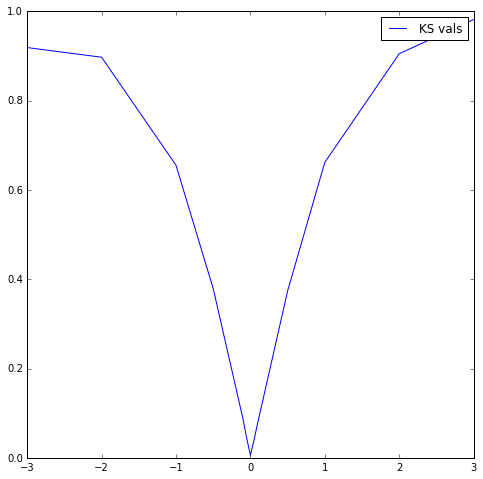

In [11]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,ksvals,label="KS vals")
plt.legend()

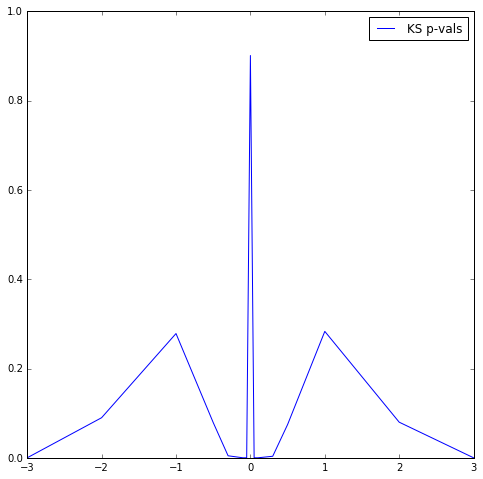

In [12]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,kspvals,label="KS p-vals")
plt.legend()

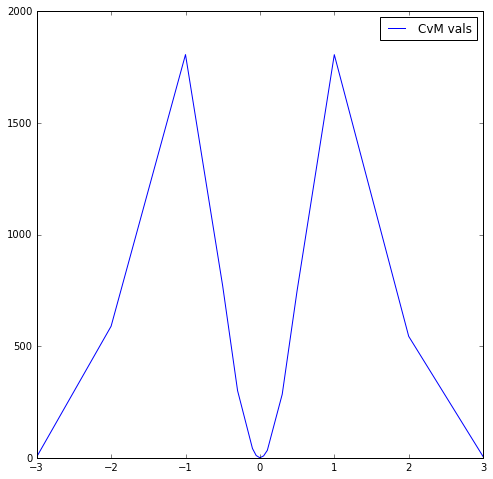

In [13]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,cvmvals,label="CvM vals")
plt.legend()

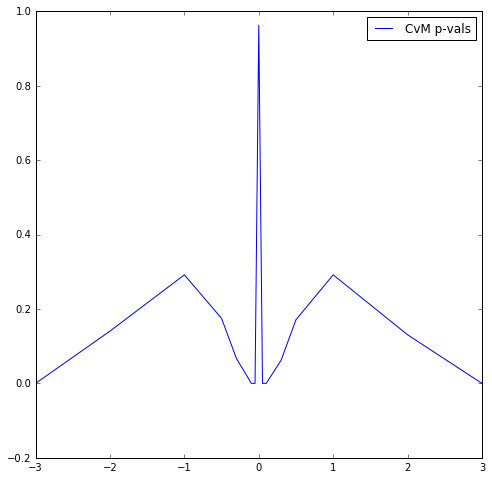

In [14]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,cvmpvals,label="CvM p-vals")
plt.legend()

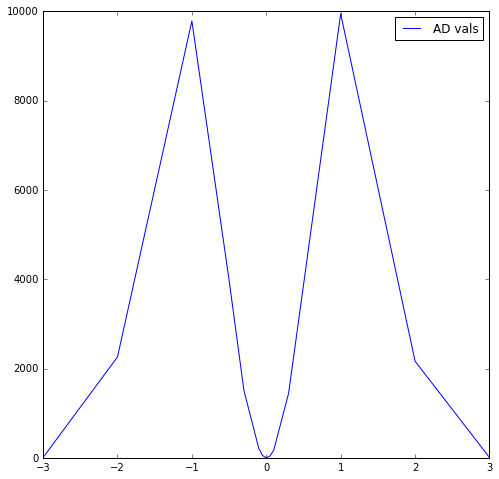

In [15]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,advals,label="AD vals")
plt.legend()

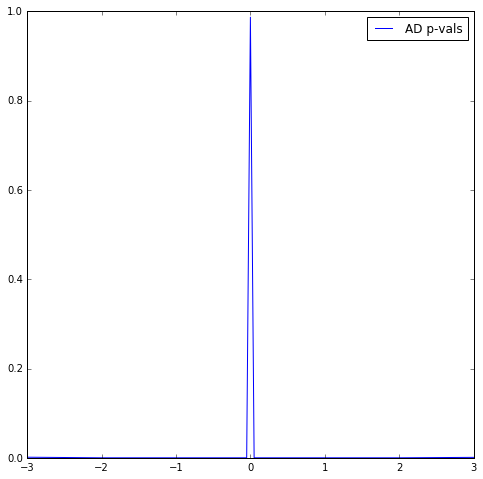

In [16]:
fig = plt.figure(figsize = (8,8))
plt.plot(dists,adpvals,label="AD p-vals")
plt.legend()

# When adding the vmin and vmax cuts to the sample, we change the size of the sample, so the statistic value is for a different number of points in the different scenarios and therefore not quite as comparable as before.  However, the p-value issues remains regardless, so trimming PIT values for KS and CvM is a bad idea.  This is a reminder that the AD value for different codes that have different numbers of catastrophic PIT=0.0 and 1.0 values will be an issue, though!